# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#QUESTIONS: Convert UTC to Date format? what is the R value again? WHat does it indicate? How to get 500n?

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
from scipy.stats import linregress
from pprint import pprint 
import time 


# Import API key
from api_keys import openweather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#print(openweather_api)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+ openweather_api
city_list=[]
print("Beginning Data Retreival")
print("~~~~~~~~~~~~~~~")
record_count=1
#set_count=1
        
for i, city in enumerate (cities): 
    query_url=base_url + "&q=" + city 
    print("Processing record %s | %s" % (record_count, city))
    print("~~~~~~~~~~")
    record_count+=1
        
    try:
        weather_json = requests.get(query_url).json()
        city_name = weather_json['name']
        city_country=weather_json['sys']['country']
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_maxtemp= weather_json['main']['temp_max']
        city_clouds = weather_json['clouds']['all']
        city_humidity = weather_json['main']['humidity']
        city_wind = weather_json['wind']['speed']
        city_date = weather_json['dt']
        city_list.append({"City": city_name, "Country": city_country, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_maxtemp, "Cloudiness": city_clouds,
                       "Humidity": city_humidity, "Wind Speed":city_wind, "Date":city_date})

    except: 
        print("Error! Moving onto next city")
        print("~~~~~~~~~")
        pass

print("Data Retreival completed.")
#Wanderlandia error - {'cod': '404', 'message': 'city not found'}




Beginning Data Retreival
~~~~~~~~~~~~~~~
Processing record 1 | cape town
~~~~~~~~~~
Processing record 2 | east london
~~~~~~~~~~
Processing record 3 | port alfred
~~~~~~~~~~
Processing record 4 | amapa
~~~~~~~~~~
Processing record 5 | cayenne
~~~~~~~~~~
Processing record 6 | halalo
~~~~~~~~~~
Error! Moving onto next city
~~~~~~~~~
Processing record 7 | lianyuan
~~~~~~~~~~
Processing record 8 | goderich
~~~~~~~~~~
Processing record 9 | katsina
~~~~~~~~~~
Processing record 10 | hermanus
~~~~~~~~~~
Processing record 11 | yar-sale
~~~~~~~~~~
Processing record 12 | saint-philippe
~~~~~~~~~~
Processing record 13 | saint-pierre
~~~~~~~~~~
Processing record 14 | fernley
~~~~~~~~~~
Processing record 15 | qaanaaq
~~~~~~~~~~
Processing record 16 | hilo
~~~~~~~~~~
Processing record 17 | saldanha
~~~~~~~~~~
Processing record 18 | mahajanga
~~~~~~~~~~
Processing record 19 | mataura
~~~~~~~~~~
Processing record 20 | vila franca do campo
~~~~~~~~~~
Processing record 21 | haines junction
~~~~~~~~~~
Pro

Processing record 176 | kushmurun
~~~~~~~~~~
Processing record 177 | moindou
~~~~~~~~~~
Processing record 178 | blora
~~~~~~~~~~
Processing record 179 | hongjiang
~~~~~~~~~~
Processing record 180 | ribeira grande
~~~~~~~~~~
Processing record 181 | phalombe
~~~~~~~~~~
Processing record 182 | severo-kurilsk
~~~~~~~~~~
Processing record 183 | kodiak
~~~~~~~~~~
Processing record 184 | uzumlu
~~~~~~~~~~
Error! Moving onto next city
~~~~~~~~~
Processing record 185 | aosta
~~~~~~~~~~
Processing record 186 | victoria
~~~~~~~~~~
Processing record 187 | lebu
~~~~~~~~~~
Processing record 188 | liverpool
~~~~~~~~~~
Processing record 189 | yangambi
~~~~~~~~~~
Processing record 190 | kingsburg
~~~~~~~~~~
Processing record 191 | namatanai
~~~~~~~~~~
Processing record 192 | kaitangata
~~~~~~~~~~
Processing record 193 | burns lake
~~~~~~~~~~
Processing record 194 | mapimi
~~~~~~~~~~
Processing record 195 | mairi
~~~~~~~~~~
Processing record 196 | barentsburg
~~~~~~~~~~
Error! Moving onto next city
~~~~

Processing record 347 | chernyshevskiy
~~~~~~~~~~
Processing record 348 | bambous virieux
~~~~~~~~~~
Processing record 349 | tilichiki
~~~~~~~~~~
Processing record 350 | esperance
~~~~~~~~~~
Processing record 351 | husavik
~~~~~~~~~~
Processing record 352 | malnas
~~~~~~~~~~
Processing record 353 | bonthe
~~~~~~~~~~
Processing record 354 | narsaq
~~~~~~~~~~
Processing record 355 | neiafu
~~~~~~~~~~
Processing record 356 | sur
~~~~~~~~~~
Processing record 357 | eureka
~~~~~~~~~~
Processing record 358 | sylacauga
~~~~~~~~~~
Processing record 359 | palmer
~~~~~~~~~~
Processing record 360 | itarema
~~~~~~~~~~
Processing record 361 | port-gentil
~~~~~~~~~~
Processing record 362 | inderborskiy
~~~~~~~~~~
Error! Moving onto next city
~~~~~~~~~
Processing record 363 | moose factory
~~~~~~~~~~
Processing record 364 | the pas
~~~~~~~~~~
Processing record 365 | izhma
~~~~~~~~~~
Processing record 366 | ust-kut
~~~~~~~~~~
Processing record 367 | pasni
~~~~~~~~~~
Processing record 368 | letka
~~~~~~

Processing record 522 | ospina perez
~~~~~~~~~~
Error! Moving onto next city
~~~~~~~~~
Processing record 523 | ambalema
~~~~~~~~~~
Processing record 524 | tura
~~~~~~~~~~
Processing record 525 | margate
~~~~~~~~~~
Processing record 526 | badou
~~~~~~~~~~
Processing record 527 | auki
~~~~~~~~~~
Processing record 528 | antiguo morelos
~~~~~~~~~~
Processing record 529 | boralday
~~~~~~~~~~
Processing record 530 | luocheng
~~~~~~~~~~
Processing record 531 | kem
~~~~~~~~~~
Processing record 532 | nguiu
~~~~~~~~~~
Error! Moving onto next city
~~~~~~~~~
Processing record 533 | bandar-e lengeh
~~~~~~~~~~
Processing record 534 | istmina
~~~~~~~~~~
Processing record 535 | bara
~~~~~~~~~~
Processing record 536 | mocambique
~~~~~~~~~~
Error! Moving onto next city
~~~~~~~~~
Processing record 537 | ejea de los caballeros
~~~~~~~~~~
Processing record 538 | beroroha
~~~~~~~~~~
Processing record 539 | mount isa
~~~~~~~~~~
Processing record 540 | contai
~~~~~~~~~~
Processing record 541 | jujuy
~~~~~~~~~

### Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [5]:
city_list_df=pd.DataFrame(city_list)
city_list_df.head()

#create a dataframe from the list of dictionaries 


,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Date
0,Cape Town,ZA,-33.93,18.42,68.00,0,82,12.75,1608330422
1,East London,ZA,-33.02,27.91,71.40,100,89,14.00,1608330438
2,Port Alfred,ZA,-33.59,26.89,69.01,76,91,4.00,1608330438
3,Amapá,BR,1.00,-52.00,77.56,75,80,5.12,1608330438
4,Cayenne,GF,4.93,-52.33,80.60,100,88,9.17,1608330438


In [6]:
city_list_df["Date"] = pd.to_datetime(city_list_df["Date"], unit = "s")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_list_df.describe()

,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,19.347057,15.440637,50.725800,55.857143,74.648881,8.267728
std,33.450467,90.285403,30.258502,37.895754,18.452005,5.301593
min,-54.800000,-175.200000,-45.400000,0.000000,1.000000,0.380000
25%,-8.580000,-68.300000,31.860000,20.000000,67.000000,4.470000
50%,23.700000,18.420000,60.800000,72.000000,78.000000,7.000000
75%,47.430000,92.480000,76.080000,91.000000,88.000000,11.410000
max,78.220000,179.320000,96.800000,100.000000,100.000000,37.510000


In [9]:
#  Get the indices of cities that have humidity over 100%.

high_humid_df = city_list_df[(city_list_df["Humidity"] >= 100)].index
high_humid_df
#high_humid_list=high_humid_df.index.values.tolist()
#high_humid_list

Int64Index([ 33,  35,  53,  80,  84,  99, 110, 152, 159, 183, 269, 301, 309,
            368, 375, 405, 415, 448, 465, 484, 510, 537],
           dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = city_list_df.drop(high_humid_df, inplace=False)
clean_city_data

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Date
0,Cape Town,ZA,-33.93,18.42,68.00,0,82,12.75,2020-12-18 22:27:02
1,East London,ZA,-33.02,27.91,71.40,100,89,14.00,2020-12-18 22:27:18
2,Port Alfred,ZA,-33.59,26.89,69.01,76,91,4.00,2020-12-18 22:27:18
3,Amapá,BR,1.00,-52.00,77.56,75,80,5.12,2020-12-18 22:27:18
4,Cayenne,GF,4.93,-52.33,80.60,100,88,9.17,2020-12-18 22:27:18
...,...,...,...,...,...,...,...,...,...
576,Akdağmadeni,TR,39.66,35.88,29.89,0,93,1.52,2020-12-18 22:28:10
577,Diapaga,BF,12.07,1.79,76.68,22,18,6.31,2020-12-18 22:28:10
578,Ilek,RU,51.53,53.38,18.45,79,97,7.25,2020-12-18 22:28:10
579,Lukulu,ZM,-14.37,23.24,68.63,100,92,6.02,2020-12-18 22:28:10


In [13]:
#clean_city_data["Date"] = clean_city_data["Date"].dt.date
#clean_city_data

In [14]:
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [42]:
short_date=clean_city_data["Date"][1]
short_date

datetime.date(2020, 12, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

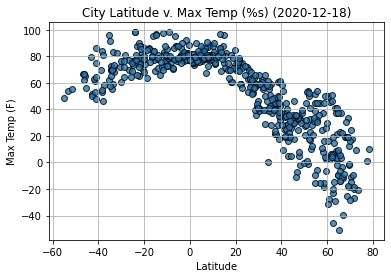

In [46]:

x_values=clean_city_data["Lat"].astype('float')
y_values=clean_city_data["Max Temp"].astype('float')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)
plt.title("City Latitude v. Max Temp (%s) (" + str(short_date) +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("../WeatherPy/LatvTemp_all.png")
plt.show

In [ ]:
#This plot is demonstrating the relationship between latitude and temperature. 
#You'll notice that the closer to the equator a city is (lat 0*), the higher the max temperature.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

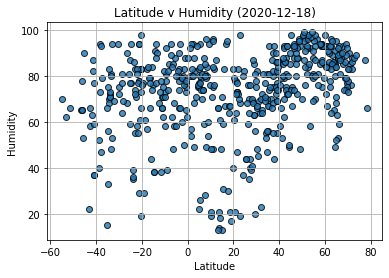

In [45]:
x_values=clean_city_data["Lat"].astype('float')
y_values=clean_city_data["Humidity"].astype('float')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)
plt.title("Latitude v Humidity (" + str(short_date) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../WeatherPy/LatvHumidity_all.png")
plt.show

In [ ]:
#This is plotting the relationship between latitude and humidity.
#Based on this plot, it appears that latitude has minimal impact on humidity

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

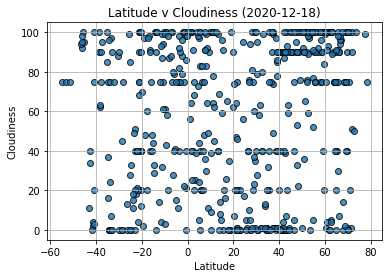

In [64]:
x_values=clean_city_data["Lat"].astype('float')
y_values=clean_city_data["Cloudiness"].astype('float')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)
plt.title("Latitude v Cloudiness (" + str(short_date) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../WeatherPy/LatvClouds_all.png")
plt.show

In [ ]:
#this is plotting the relationship between latitude and cloudiness 
#again it appears that there is no direct relationship between the two variables

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

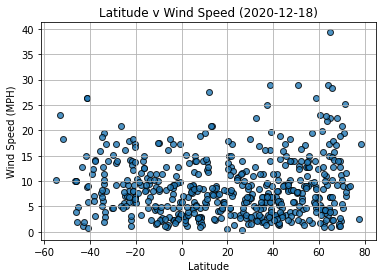

In [65]:
x_values=clean_city_data["Lat"].astype('float')
y_values=clean_city_data["Wind Speed"].astype('float')
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)
plt.title(f"Latitude v Wind Speed (" + str(short_date) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("../WeatherPy/LatvWind_all.png")
plt.show

In [ ]:
#this is plotting wind speed v latitude 
#there appears to be no meaningful relationship between the two variables

## Linear Regression

In [56]:
#parse the dataframe by hemisphere

clean_columns = clean_city_data.columns

N_Hemi = clean_city_data.loc[clean_city_data["Lat"] > 0,  clean_columns]

N_Hemi.head()

,City,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Date
2,Bosaso,11.28,49.18,79.77,64,75,13.69,2020-12-18
3,George Town,5.41,100.34,77.00,40,94,5.82,2020-12-18
4,Lagoa,39.05,-27.98,60.40,85,69,19.71,2020-12-18
5,Baruun-Urt,46.68,113.28,-7.33,0,88,8.50,2020-12-18
7,Ribeira Grande,38.52,-28.70,60.80,40,72,16.11,2020-12-18


In [57]:
S_Hemi = clean_city_data.loc[clean_city_data["Lat"] < 0,  clean_columns]
S_Hemi.head()

,City,Lat,Lng,Max Temp,Cloudiness,Humidity,Wind Speed,Date
0,Mataura,-46.19,168.86,66.99,92,65,10.00,2020-12-18
1,Hithadhoo,-0.60,73.08,82.54,21,73,9.91,2020-12-18
6,Ambulu,-8.35,113.61,75.76,87,85,2.64,2020-12-18
15,Cape Town,-33.93,18.42,72.00,0,72,19.46,2020-12-18
19,Rikitea,-23.12,-134.97,77.59,51,74,17.96,2020-12-18


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.752057376789384


<function matplotlib.pyplot.show(close=None, block=None)>

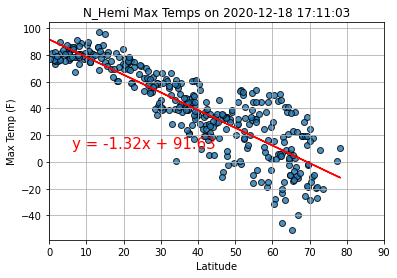

In [66]:
#set axis values 
x_values=N_Hemi["Lat"].astype('float')
y_values=N_Hemi["Max Temp"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#format and label the plot 
plt.title(f"N_Hemi Max Temps on {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(0, 90)
plt.grid()


#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvTemp_NHemi.png")
plt.show


In [ ]:
#this graph and the r value indicate there is a strong correlation between latitude and max temperatures
#the farther from the equator, the lower the max temp is 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.33976712201277176


<function matplotlib.pyplot.show(close=None, block=None)>

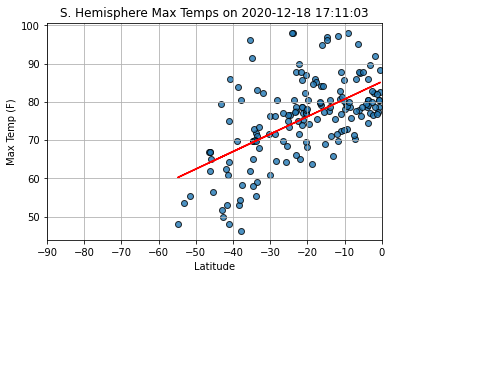

In [67]:
#set axis values 
x_values=S_Hemi["Lat"].astype('float')
y_values=S_Hemi["Max Temp"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"S. Hemisphere Max Temps on {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.xlim(-90, 0)
plt.grid()


#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvTemp_SHemi.png")
plt.show

In [ ]:
#this graph and the r value indicate there is a correlation between latitude and max temperatures
#the closer to the equator, the higher the max temp is 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.14305132853152044


<function matplotlib.pyplot.show(close=None, block=None)>

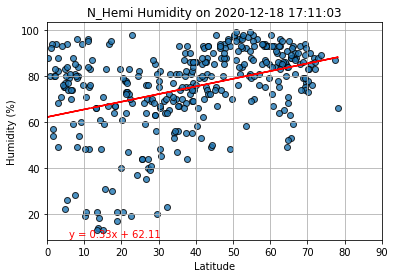

In [68]:
#set axis values 
x_values=N_Hemi["Lat"].astype('float')
y_values=N_Hemi["Humidity"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"N_Hemi Humidity on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(0, 90)
plt.grid()

#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvHumidity_NHemi.png")
plt.show

In [ ]:
#the relationship between humidity and latitude is negligible

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.03783696066870887


<function matplotlib.pyplot.show(close=None, block=None)>

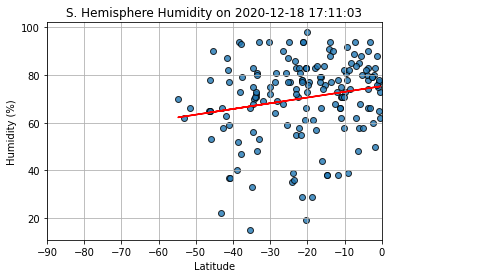

In [69]:
#set axis values 
x_values=S_Hemi["Lat"].astype('float')
y_values=S_Hemi["Humidity"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"S. Hemisphere Humidity on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 0)
plt.grid()


#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvHumidity_SHemi.png")
plt.show

In [ ]:
#the relationship between humidity and latitude is negligible

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03528241752592857


<function matplotlib.pyplot.show(close=None, block=None)>

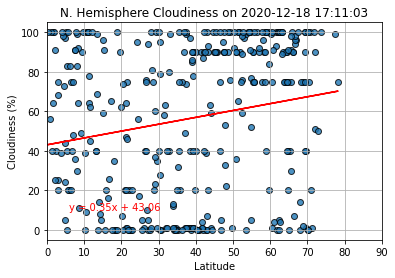

In [70]:
#set axis values 
x_values=N_Hemi["Lat"].astype('float')
y_values=N_Hemi["Cloudiness"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"N. Hemisphere Cloudiness on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(0, 90)
plt.grid()

#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvClouds_NHemi.png")
plt.show

In [ ]:
#the relationship between cloudiness and latitude is negligible

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.020037893866719076


<function matplotlib.pyplot.show(close=None, block=None)>

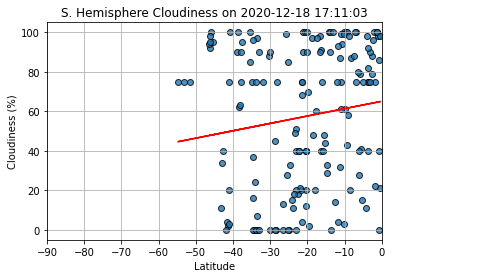

In [71]:
#set axis values 
x_values=S_Hemi["Lat"].astype('float')
y_values=S_Hemi["Cloudiness"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"S. Hemisphere Cloudiness on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 0)
plt.grid()


#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvClouds_SHemi.png")
plt.show

In [ ]:
#the relationship between cloudiness and latitude is negligible

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.029640919143303662


<function matplotlib.pyplot.show(close=None, block=None)>

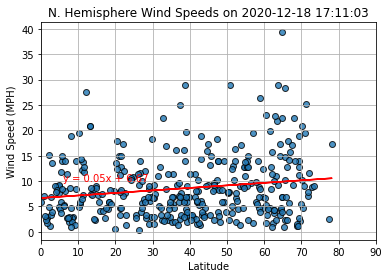

In [72]:
#set axis values 
x_values=N_Hemi["Lat"].astype('float')
y_values=N_Hemi["Wind Speed"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"N. Hemisphere Wind Speeds on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(0, 90)
plt.grid()


#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvWind_NHemi.png")
plt.show

In [ ]:
#the relationship between wind speed and latitude is negligible

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.059234386496360314


<function matplotlib.pyplot.show(close=None, block=None)>

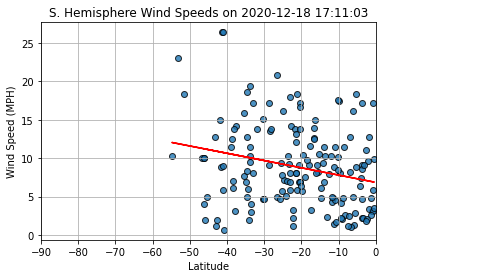

In [73]:
#set axis values 
x_values=S_Hemi["Lat"].astype('float')
y_values=S_Hemi["Wind Speed"].astype('float')

#conduct the linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the data 
plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.8)

#plot the linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7.5,10),fontsize=10,color="red")

#format and label the plot 
plt.title(f"S. Hemisphere Wind Speeds on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-90, 0)
plt.grid()


#display the R value
print(f"R squared: {rvalue**2}")

plt.savefig("../WeatherPy/LatvWind_SHemi.png")
plt.show

In [ ]:
#the relationship between wind speed and latitude is negligible

In [ ]:
#in short, latitude and temperature have the strongest relationship. 
#The other weather factors (humidity, cloudiness, and wind speed) are less impacted by latitude. 
#Important to note is that weather is impacted by time of year, and this data is considering only a single date in December.